##### Check summertime PAR values to infer units

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as dt
import glob

%matplotlib inline

In [2]:
t0=dt.datetime(2015,7,1)
te=dt.datetime(2015,8,1)
ii=1 # daily files
nlen=int((te-t0).days/ii)
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
tlist=[t0+dt.timedelta(days=ii*10) for ii in range(0,nlen)]
sdir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
fformat1='%d%b%y'
meanPAR0=np.zeros((24*len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    i0=24*ind
    i1=24*(ind+1)
    i1
    cdir=idt0.strftime(fformat1).lower()
    f=nc.Dataset(glob.glob(sdir+cdir+'/SalishSea_1h_*_carp_T.nc')[0])
    meanPAR0[i0:i1]=np.mean(np.mean(f.variables['PAR'][:,0,:,:],2),1)
    

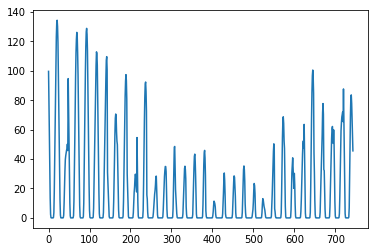

In [3]:
plt.plot(meanPAR0)